In [1]:
import pandas as pd
import numpy as np

# Load the dataset
df = pd.read_csv(r"C:\Users\Harish Kumar\Downloads\Crime_Data_from_2020_to_Present.csv")

# Show basic structure
print(df.shape)
print(df.columns)
df.head()


(1005198, 28)
Index(['DR_NO', 'Date Rptd', 'DATE OCC', 'TIME OCC', 'AREA', 'AREA NAME',
       'Rpt Dist No', 'Part 1-2', 'Crm Cd', 'Crm Cd Desc', 'Mocodes',
       'Vict Age', 'Vict Sex', 'Vict Descent', 'Premis Cd', 'Premis Desc',
       'Weapon Used Cd', 'Weapon Desc', 'Status', 'Status Desc', 'Crm Cd 1',
       'Crm Cd 2', 'Crm Cd 3', 'Crm Cd 4', 'LOCATION', 'Cross Street', 'LAT',
       'LON'],
      dtype='object')


,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
0,190326475,03/01/2020 12:00:00 AM,03/01/2020 12:00:00 AM,2130,7,Wilshire,784,1,510,VEHICLE - STOLEN,...,AA,Adult Arrest,510.0,998.0,NaN,NaN,1900 S LONGWOOD AV,NaN,34.0375,-118.3506
1,200106753,02/09/2020 12:00:00 AM,02/08/2020 12:00:00 AM,1800,1,Central,182,1,330,BURGLARY FROM VEHICLE,...,IC,Invest Cont,330.0,998.0,NaN,NaN,1000 S FLOWER ST,NaN,34.0444,-118.2628
2,200320258,11/11/2020 12:00:00 AM,11/04/2020 12:00:00 AM,1700,3,Southwest,356,1,480,BIKE - STOLEN,...,IC,Invest Cont,480.0,NaN,NaN,NaN,1400 W 37TH ST,NaN,34.0210,-118.3002
3,200907217,05/10/2023 12:00:00 AM,03/10/2020 12:00:00 AM,2037,9,Van Nuys,964,1,343,SHOPLIFTING-GRAND THEFT ($950.01 & OVER),...,IC,Invest Cont,343.0,NaN,NaN,NaN,14000 RIVERSIDE DR,NaN,34.1576,-118.4387
4,200412582,09/09/2020 12:00:00 AM,09/09/2020 12:00:00 AM,630,4,Hollenbeck,413,1,510,VEHICLE - STOLEN,...,IC,Invest Cont,510.0,NaN,NaN,NaN,200 E AVENUE 28,NaN,34.0820,-118.2130


In [2]:
# If statement
if df.isnull().sum().any():
    print("There are missing values.")

# For loop
for col in df.columns[:5]:
    print(f"Column: {col}, Unique values: {df[col].nunique()}")


There are missing values.
Column: DR_NO, Unique values: 1005198
Column: Date Rptd, Unique values: 1906
Column: DATE OCC, Unique values: 1901
Column: TIME OCC, Unique values: 1439
Column: AREA, Unique values: 21


In [3]:
def check_missing(data):
    missing = data.isnull().sum()
    print(missing[missing > 0])

# Use the function
check_missing(df)


Mocodes            151760
Vict Sex           144782
Vict Descent       144794
Premis Cd              16
Premis Desc           588
Weapon Used Cd     677918
Weapon Desc        677918
Status                  1
Crm Cd 1               11
Crm Cd 2           936039
Crm Cd 3          1002884
Crm Cd 4          1005134
Cross Street       850955
dtype: int64


In [4]:
# Step: Missing Data Handling

# 1. Fill missing 'Premis Cd' with most frequent value (mode)
df['Premis Cd'].fillna(df['Premis Cd'].mode()[0], inplace=True)

# 2. Fill missing 'Premis Desc' with a placeholder
df['Premis Desc'].fillna('Unknown', inplace=True)

# 3. Handle missing victim details
df['Vict Sex'].fillna('X', inplace=True)                  # 'X' for unknown
df['Vict Descent'].fillna('Unknown', inplace=True)        # 'Unknown' placeholder

# 4. Handle missing weapon info
df['Weapon Used Cd'].fillna(0, inplace=True)              # 0 indicates not reported
df['Weapon Desc'].fillna('None', inplace=True)

# 5. Drop column with too many missing values
df.drop(columns=['Cross Street'], inplace=True)

# 6. Optional: Drop 'Status' if only 1 missing
df['Status'].fillna('Unknown', inplace=True)

# Final: Check if anything still missing
def check_missing(data):
    missing = data.isnull().sum()
    print(missing[missing > 0])

check_missing(df)


C:\Users\Harish Kumar\AppData\Local\Temp\ipykernel_16024\3953999051.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Premis Cd'].fillna(df['Premis Cd'].mode()[0], inplace=True)
C:\Users\Harish Kumar\AppData\Local\Temp\ipykernel_16024\3953999051.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values alway

Mocodes      151760
Crm Cd 1         11
Crm Cd 2     936039
Crm Cd 3    1002884
Crm Cd 4    1005134
dtype: int64


In [5]:
# Most frequent crime types

top_crimes = df['Crm Cd Desc'].value_counts().head(10)
print(top_crimes)

Crm Cd Desc
VEHICLE - STOLEN                                           115247
BATTERY - SIMPLE ASSAULT                                    74847
BURGLARY FROM VEHICLE                                       63518
THEFT OF IDENTITY                                           62539
VANDALISM - FELONY ($400 & OVER, ALL CHURCH VANDALISMS)     61094
BURGLARY                                                    57879
THEFT PLAIN - PETTY ($950 & UNDER)                          53723
ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT              53532
INTIMATE PARTNER - SIMPLE ASSAULT                           46712
THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER)             41316
Name: count, dtype: int64


In [6]:
# Convert 'DATE OCC' to datetime if not already
df['DATE OCC'] = pd.to_datetime(df['DATE OCC'])

# Extract year from date
df['Year'] = df['DATE OCC'].dt.year

# Crime counts per year
crime_by_year = df['Year'].value_counts().sort_index()
print(crime_by_year)


C:\Users\Harish Kumar\AppData\Local\Temp\ipykernel_16024\370007927.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['DATE OCC'] = pd.to_datetime(df['DATE OCC'])


Year
2020    199847
2021    209875
2022    235258
2023    232350
2024    127574
2025       294
Name: count, dtype: int64


In [7]:
top_weapons = df['Weapon Desc'].value_counts().head(5)
print(top_weapons)


Weapon Desc
None                                              677918
STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)    174777
UNKNOWN WEAPON/OTHER WEAPON                        36394
VERBAL THREAT                                      23848
HAND GUN                                           20186
Name: count, dtype: int64


In [8]:
gender_crime = df['Vict Sex'].value_counts()
print(gender_crime)


Vict Sex
M    403916
F    358599
X    242568
H       114
-         1
Name: count, dtype: int64


In [9]:
import numpy as np

# Example: Convert a column to numpy array
crm_cd_array = df['Crm Cd'].to_numpy()

# Basic NumPy operations
print(np.mean(crm_cd_array))
print(np.unique(crm_cd_array))


500.1457832188285
[110 113 121 122 210 220 230 231 235 236 237 250 251 310 320 330 331 341
 343 345 347 349 350 351 352 353 354 410 420 421 432 433 434 435 436 437
 438 439 440 441 442 443 444 445 446 450 451 452 453 470 471 473 474 475
 480 485 487 510 520 522 622 623 624 625 626 627 647 648 649 651 652 653
 654 660 661 662 664 666 668 670 740 745 753 755 756 760 761 762 763 805
 806 810 812 813 814 815 820 821 822 830 840 845 850 860 865 870 880 882
 884 886 888 890 900 901 902 903 904 906 910 920 921 922 924 926 928 930
 931 932 933 940 942 943 944 946 948 949 950 951 954 956]


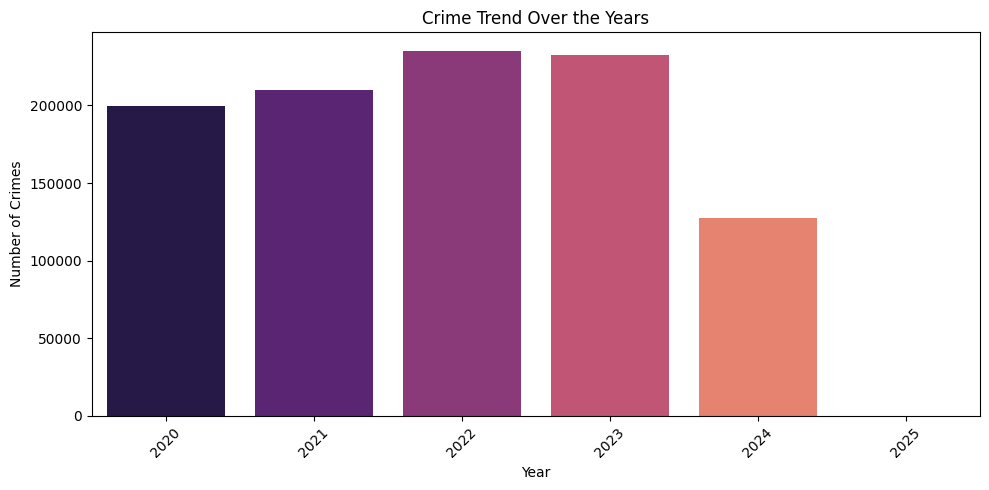

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Crime count by year
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='Year', palette='magma')
plt.title('Crime Trend Over the Years')
plt.xticks(rotation=45)
plt.ylabel("Number of Crimes")
plt.tight_layout()
plt.show()


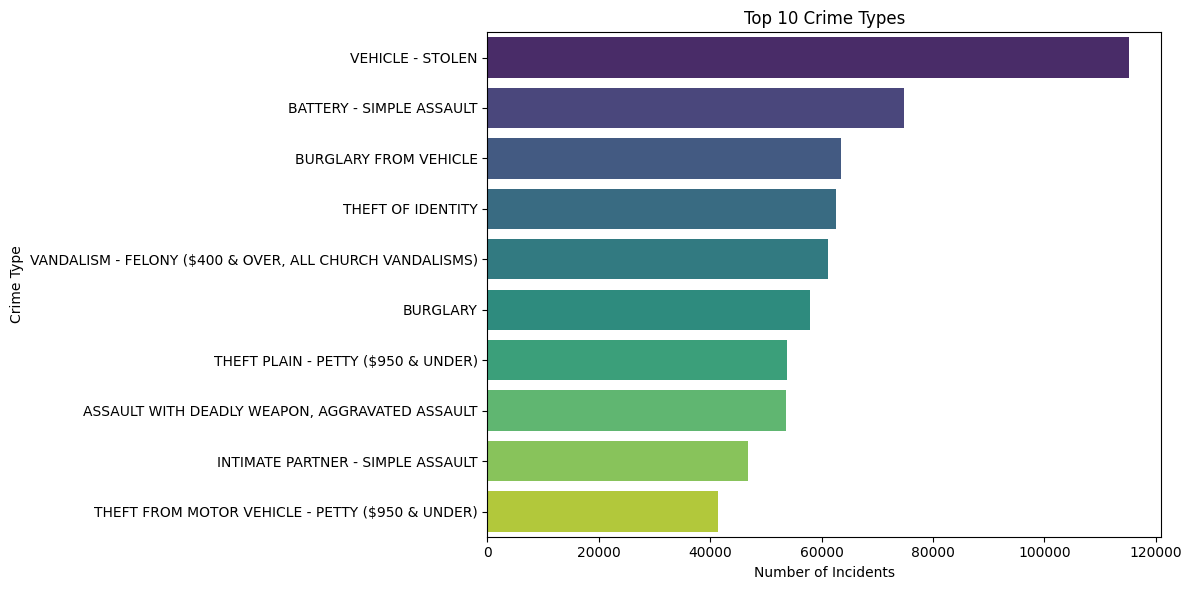

In [11]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
top_crime_types = df['Crm Cd Desc'].value_counts().head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_crime_types.values, y=top_crime_types.index, palette='viridis')
plt.title('Top 10 Crime Types')
plt.xlabel("Number of Incidents")
plt.ylabel("Crime Type")
plt.tight_layout()
plt.show()


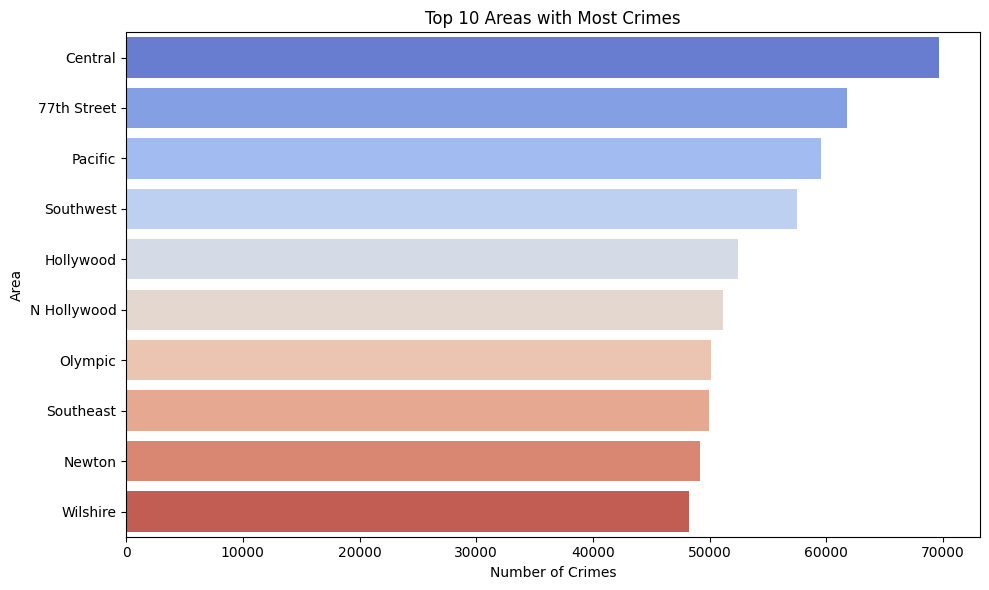

In [12]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
area_crimes = df['AREA NAME'].value_counts().head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=area_crimes.values, y=area_crimes.index, palette='coolwarm')
plt.title('Top 10 Areas with Most Crimes')
plt.xlabel("Number of Crimes")
plt.ylabel("Area")
plt.tight_layout()
plt.show()


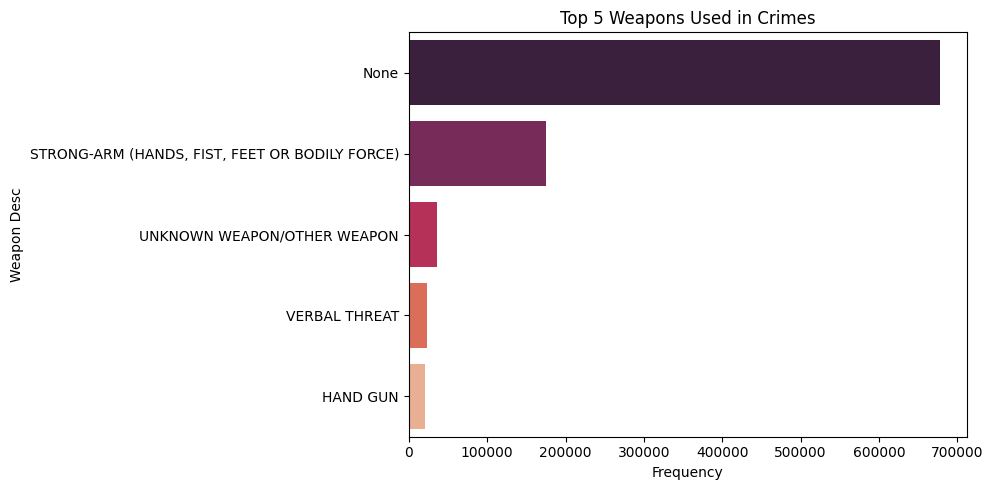

In [13]:


weapon_use = df['Weapon Desc'].value_counts().head(5)

plt.figure(figsize=(10, 5))
sns.barplot(x=weapon_use.values, y=weapon_use.index, palette='rocket')
plt.title('Top 5 Weapons Used in Crimes')
plt.xlabel("Frequency")
plt.tight_layout()
plt.show()



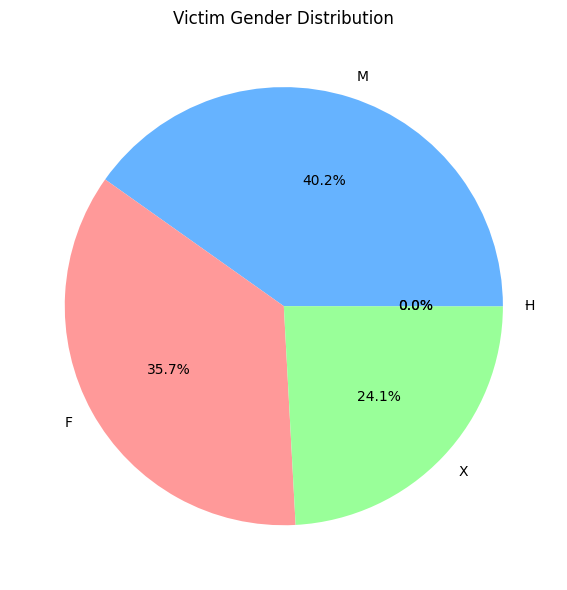

In [14]:
plt.figure(figsize=(6, 6))
df['Vict Sex'].value_counts().plot.pie(autopct='%1.1f%%', colors=['#66b3ff','#ff9999','#99ff99'])
plt.title('Victim Gender Distribution')
plt.ylabel('')
plt.tight_layout()
plt.show()


In [15]:
# Summary of numerical columns
df.describe()


,DR_NO,DATE OCC,TIME OCC,AREA,Rpt Dist No,Part 1-2,Crm Cd,Vict Age,Premis Cd,Weapon Used Cd,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LAT,LON,Year
count,1.005198e+06,1005198,1.005198e+06,1.005198e+06,1.005198e+06,1.005198e+06,1.005198e+06,1.005198e+06,1.005198e+06,1.005198e+06,1.005187e+06,69159.000000,2314.000000,64.00000,1.005198e+06,1.005198e+06,1.005198e+06
mean,2.202277e+08,2022-05-13 22:42:44.629057792,1.339911e+03,1.069098e+01,1.115556e+03,1.400283e+00,5.001458e+02,2.891253e+01,3.056157e+02,1.184988e+02,4.999063e+02,958.105221,984.015990,991.21875,3.399820e+01,-1.180909e+02,2.021879e+03
min,8.170000e+02,2020-01-01 00:00:00,1.000000e+00,1.000000e+00,1.010000e+02,1.000000e+00,1.100000e+02,-4.000000e+00,1.010000e+02,0.000000e+00,1.100000e+02,210.000000,310.000000,821.00000,0.000000e+00,-1.186676e+02,2.020000e+03
25%,2.106169e+08,2021-04-06 00:00:00,9.000000e+02,5.000000e+00,5.870000e+02,1.000000e+00,3.310000e+02,0.000000e+00,1.010000e+02,0.000000e+00,3.310000e+02,998.000000,998.000000,998.00000,3.401470e+01,-1.184305e+02,2.021000e+03
50%,2.209160e+08,2022-05-26 00:00:00,1.420000e+03,1.100000e+01,1.139000e+03,1.000000e+00,4.420000e+02,3.000000e+01,2.030000e+02,0.000000e+00,4.420000e+02,998.000000,998.000000,998.00000,3.405890e+01,-1.183225e+02,2.022000e+03
75%,2.311105e+08,2023-06-22 00:00:00,1.900000e+03,1.600000e+01,1.613000e+03,2.000000e+00,6.260000e+02,4.400000e+01,5.010000e+02,3.070000e+02,6.260000e+02,998.000000,998.000000,998.00000,3.416490e+01,-1.182739e+02,2.023000e+03
max,2.521041e+08,2025-03-27 00:00:00,2.359000e+03,2.100000e+01,2.199000e+03,2.000000e+00,9.560000e+02,1.200000e+02,9.760000e+02,5.160000e+02,9.560000e+02,999.000000,999.000000,999.00000,3.433430e+01,0.000000e+00,2.025000e+03
std,1.320282e+07,NaN,6.510531e+02,6.110385e+00,6.111733e+02,4.899559e-01,2.052635e+02,2.199382e+01,2.193158e+02,1.845835e+02,2.050640e+02,110.354136,52.350982,27.06985,1.610549e+00,5.581812e+00,1.315655e+00


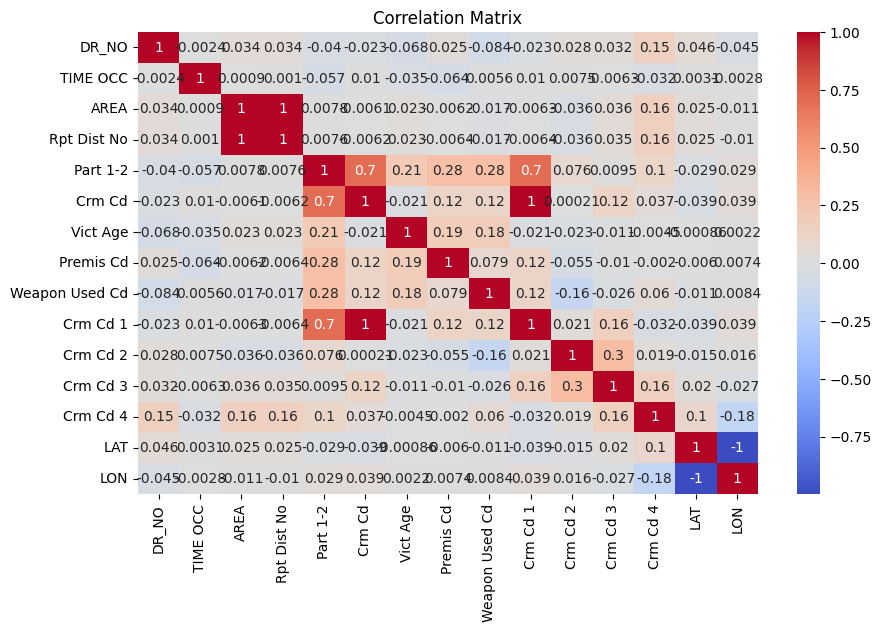

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numeric columns
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Plot correlation heatmap
plt.figure(figsize=(10,6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()


In [17]:
# Example: Outlier detection for 'Vict Age' column
Q1 = df['Vict Age'].quantile(0.25)
Q3 = df['Vict Age'].quantile(0.75)
IQR = Q3 - Q1

outliers = df[(df['Vict Age'] < Q1 - 1.5 * IQR) | (df['Vict Age'] > Q3 + 1.5 * IQR)]
print(f"Outliers found: {len(outliers)}")


Outliers found: 1


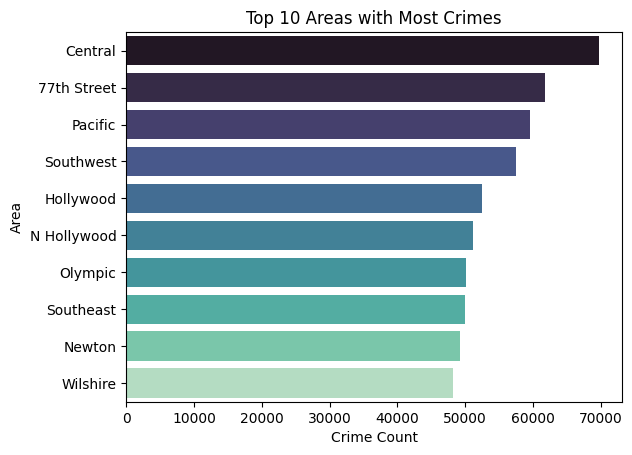

In [18]:
# Crimes per Area
area_counts = df['AREA NAME'].value_counts().head(10)
sns.barplot(x=area_counts.values, y=area_counts.index, palette='mako')
plt.title('Top 10 Areas with Most Crimes')
plt.xlabel('Crime Count')
plt.ylabel('Area')
plt.show()


In [23]:
from scipy.stats import shapiro

stat, p = shapiro(df['Vict Age'].dropna())
print(f'Statistics={stat:.3f}, p={p:.3f}')
if p > 0.05:
    print("Data is normally distributed ")
else:
    print("Data is not normally distributed ")


Statistics=0.929, p=0.000
Data is not normally distributed 


C:\Users\Harish Kumar\AppData\Local\Programs\Python\Python313\Lib\site-packages\scipy\stats\_axis_nan_policy.py:586: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 1005198.
  res = hypotest_fun_out(*samples, **kwds)


In [20]:
from scipy.stats import ttest_ind

male = df[df['Vict Sex'] == 'M']['Vict Age'].dropna()
female = df[df['Vict Sex'] == 'F']['Vict Age'].dropna()

stat, p = ttest_ind(male, female)
print(f'T-statistic={stat:.3f}, p-value={p:.3f}')


T-statistic=-24.633, p-value=0.000


In [21]:
from scipy.stats import chi2_contingency

table = pd.crosstab(df['Vict Sex'], df['Crm Cd Desc'])
chi2, p, dof, expected = chi2_contingency(table)

print(f'Chi-Square={chi2:.3f}, p-value={p:.3f}')


Chi-Square=674093.086, p-value=0.000


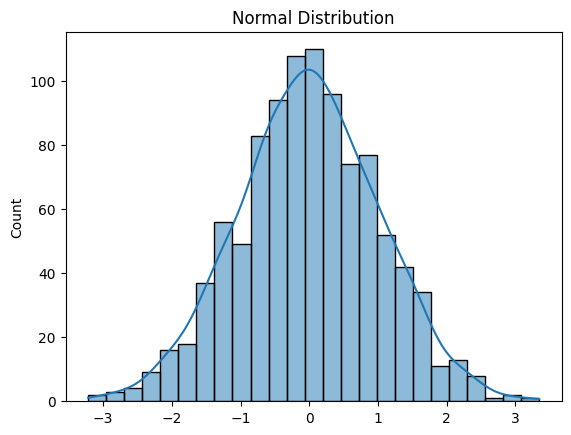

In [22]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data = np.random.normal(loc=0, scale=1, size=1000)
sns.histplot(data, kde=True)
plt.title("Normal Distribution")
plt.show()
